In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
def train_score_plot(base_estimator, label):
    scores = []
    n_estimators_range = range(1, 101, 1)
    for n_estimators in n_estimators_range:
        clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators).fit(X_train, y_train)
        scores.append(balanced_accuracy_score(y_test, clf.predict(X_test)))
#         scores.append(clf.score(X_test, y_test))
    plt.plot(n_estimators_range, scores, label=label)
#     axes = plt.gca()
#     axes.set_ylim([0, 1])
    plt.legend(loc='lower right')

In [3]:
data = pd.read_csv('vehicle.csv')
data.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [4]:
X = data.drop('Class', axis=1)
y = data.Class.replace({'bus': 1, 'saab': 2, 'opel': 3, 'van': 4})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

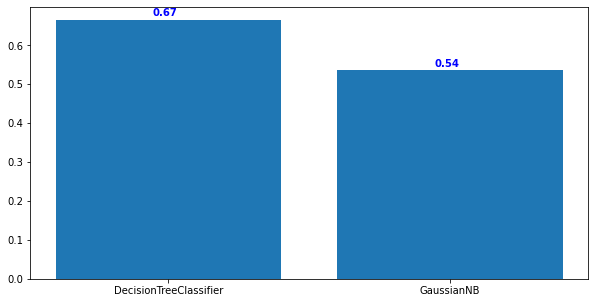

In [5]:
labels = ['DecisionTreeClassifier', 'GaussianNB']
base_estimators = [DecisionTreeClassifier(max_depth=3), GaussianNB()]

base_estimators_scores = []
for i in range(len(labels)):
    clf = base_estimators[i].fit(X_train, y_train)
    base_estimators_scores.append(clf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(labels, base_estimators_scores)
for i, v in enumerate(base_estimators_scores):
    ax.text(i - 0.055, v + 0.01, str(round(v, 2)), color='blue', fontweight='bold')

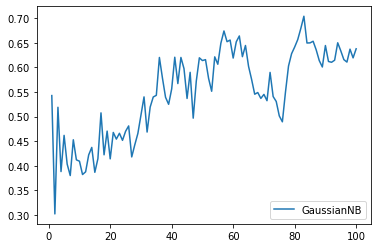

In [6]:
train_score_plot(base_estimators[1], labels[1])

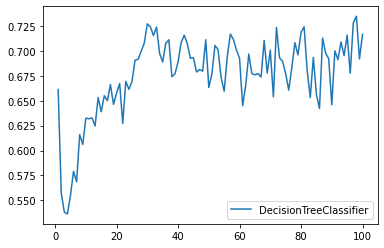

In [7]:
train_score_plot(base_estimators[0], labels[0])